# Data Preprocessing of Presidential Debate 2024 (Trump vs Harris)

In [66]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [67]:
# load the abcnews_transcript file from the data folder
with open('../data/abcnews_transcript.txt', 'r') as file:
    data = file.read()

In [68]:
trumps_responses = []
kamalas_responses = []

trump_identifier = "FORMER PRESIDENT DONALD TRUMP: "
kamala_identifier = "VICE PRESIDENT KAMALA HARRIS: "

for line in data.split('\n'):
    if line.startswith(trump_identifier):
        trumps_responses.append(line[len(trump_identifier):])
    elif line.startswith(kamala_identifier):
        kamalas_responses.append(line[len(kamala_identifier):])

print('Number of Trump responses:', len(trumps_responses))
print('Number of Kamala responses:', len(kamalas_responses))

# print the first response from each
print()
print('Trump:', trumps_responses[0])
print('Kamala:', kamalas_responses[0])

Number of Trump responses: 74
Number of Kamala responses: 34

Trump: Nice to see you. Have fun.
Kamala: Kamala Harris. Let's have a good debate.


In [69]:
# Now we want to do some basic NLP analysis on the responses of Trump and Kamala
# First, we derive some basic descriptive statistics

# Average number of words per response
trump_avg_words = sum([len(response.split()) for response in trumps_responses]) / len(trumps_responses)
kamala_avg_words = sum([len(response.split()) for response in kamalas_responses]) / len(kamalas_responses)

# Average length of words in responses
trump_avg_word_length = sum([len(word) for response in trumps_responses for word in response.split()]) / sum([len(response.split()) for response in trumps_responses])
kamala_avg_word_length = sum([len(word) for response in kamalas_responses for word in response.split()]) / sum([len(response.split()) for response in kamalas_responses])

# Total number of words in all responses
trump_total_words = sum([len(response.split()) for response in trumps_responses])
kamala_total_words = sum([len(response.split()) for response in kamalas_responses])

# Total number of unique words in all responses
trump_unique_words = len(set([word for response in trumps_responses for word in response.split()]))
kamala_unique_words = len(set([word for response in kamalas_responses for word in response.split()]))

# Average number of unique words per response
trump_avg_unique_words = trump_unique_words / len(trumps_responses)
kamala_avg_unique_words = kamala_unique_words / len(kamalas_responses)

# Average number of sentences per response
trump_avg_sentences = sum([response.count('.') for response in trumps_responses]) / len(trumps_responses)
kamala_avg_sentences = sum([response.count('.') for response in kamalas_responses]) / len(kamalas_responses)

# Now we provide an overview of the results with side by side comparison (T | K) rounded to 2 decimal places
print('Descriptive statistics of Trump and Kamala responses: T | K')
print('Number of responses:', len(trumps_responses), '|', len(kamalas_responses))
print('Average number of words per response:', round(trump_avg_words, 2), '|', round(kamala_avg_words, 2))
print('Average length of words in responses:', round(trump_avg_word_length, 2), '|', round(kamala_avg_word_length, 2))
print('Total number of words in all responses:', trump_total_words, '|', kamala_total_words)
print('Total number of unique words in all responses:', trump_unique_words, '|', kamala_unique_words)
print('Average number of unique words per response:', round(trump_avg_unique_words, 2), '|', round(kamala_avg_unique_words, 2))
print('Average number of sentences per response:', round(trump_avg_sentences, 2), '|', round(kamala_avg_sentences, 2))



Descriptive statistics of Trump and Kamala responses: T | K
Number of responses: 74 | 34
Average number of words per response: 108.88 | 172.53
Average length of words in responses: 4.32 | 4.55
Total number of words in all responses: 8057 | 5866
Total number of unique words in all responses: 1741 | 1603
Average number of unique words per response: 23.53 | 47.15
Average number of sentences per response: 10.65 | 10.24


[nltk_data] Downloading package stopwords to
[nltk_data]     /mounts/Users/cisintern/pwicke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


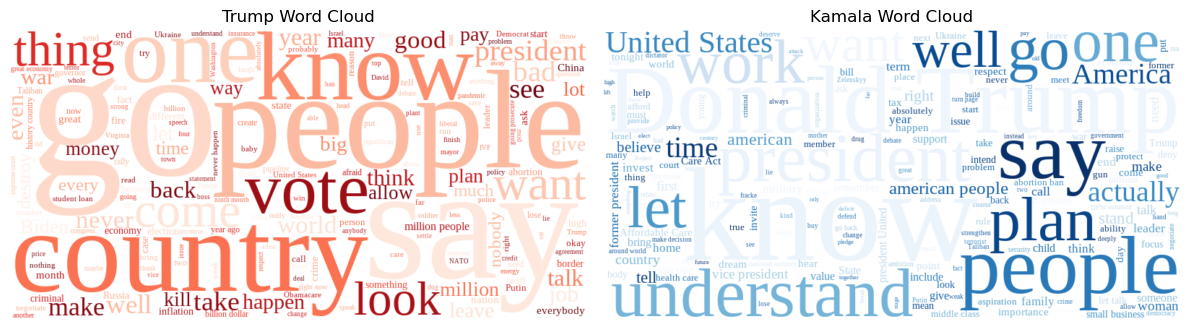

First 5 Trump words: ['nice', 'see', 'you', 'fun', 'thank']
First 5 Kamala words: ['Kamala', 'Harris', 'let', 'good', 'debate']


In [70]:
# Now we want to create word clouds and bar charts to visualize the most common words in the responses of Trump and Kamala
# Remove stopwords from the responses
import nltk
from nltk.corpus import stopwords
import spacy
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

font_path = fm.findfont(fm.FontProperties(family='Liberation Serif'))
stop_words = set(stopwords.words('english'))

trump_words = [word for response in trumps_responses for word in response.split() if word.lower() not in stop_words]
kamala_words = [word for response in kamalas_responses for word in response.split() if word.lower() not in stop_words]

# Lemmatize the words and remove punctuation as well as words distrupted by punctuation
doc = nlp(' '.join(trump_words))
trump_words = [token.lemma_ for token in doc if token.is_alpha]
doc = nlp(' '.join(kamala_words))
kamala_words = [token.lemma_ for token in doc if token.is_alpha]

# Create word clouds
# Use a red color scheme for trump and a blue color scheme for kamala
trump_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(trump_words))
kamala_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='Blues').generate(' '.join(kamala_words))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trump Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(kamala_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kamala Word Cloud')

plt.tight_layout()
plt.show()

# print the first 5 trump and kamala words
print('First 5 Trump words:', trump_words[:5])
print('First 5 Kamala words:', kamala_words[:5])


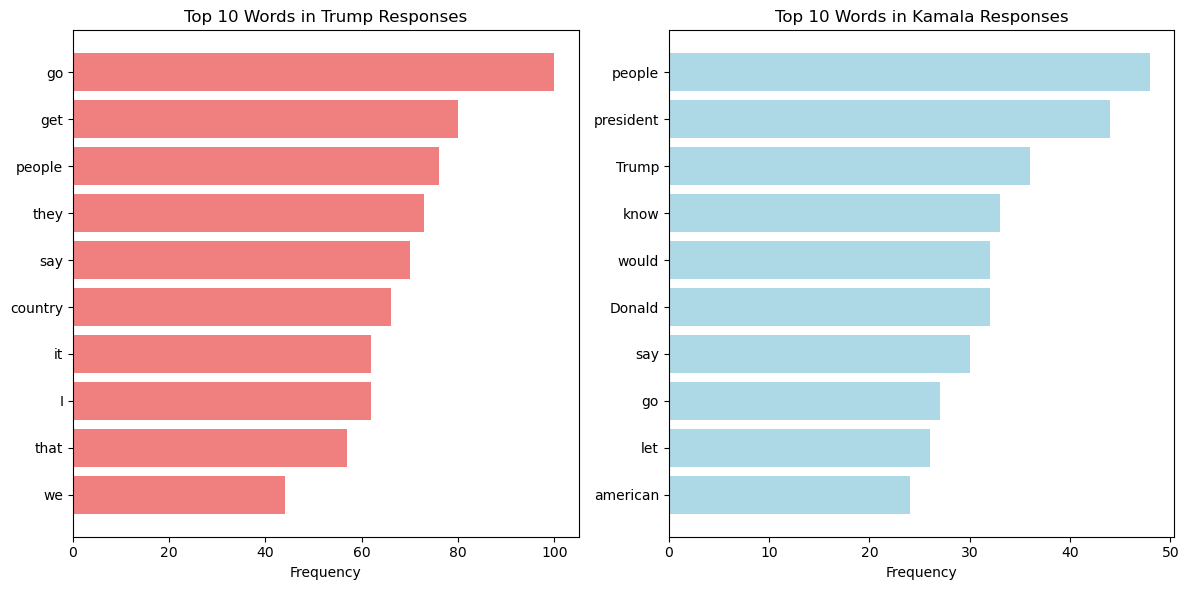

In [71]:
# Now we want to create bar charts to visualize the most common words in the responses of Trump and Kamala
# We will keep the color coding consistent with the word clouds, but in a mute color scheme
# We also want to display the top 10 most common words in each bar chart
# Most frequent words should be at the top of the bar chart

trump_word_freq = Counter(trump_words)
kamala_word_freq = Counter(kamala_words)

trump_top_words = [word for word, _ in trump_word_freq.most_common(10)]
trump_top_freqs = [freq for _, freq in trump_word_freq.most_common(10)]

kamala_top_words = [word for word, _ in kamala_word_freq.most_common(10)]
kamala_top_freqs = [freq for _, freq in kamala_word_freq.most_common(10)]

# Plot the bar charts with most frequent word at the top
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(trump_top_words, trump_top_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 10 Words in Trump Responses')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(kamala_top_words, kamala_top_freqs, color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 10 Words in Kamala Responses')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Donald Trump'),
  Text(0, 1, 'Putin'),
  Text(0, 2, 'John McCain'),
  Text(0, 3, 'Joe Biden'),
  Text(0, 4, 'Zelenskyy'),
  Text(0, 5, 'XI'),
  Text(0, 6, 'Kamala Harris'),
  Text(0, 7, 'Bush'),
  Text(0, 8, 'Mitt Romney'),
  Text(0, 9, 'Dick Cheney')])

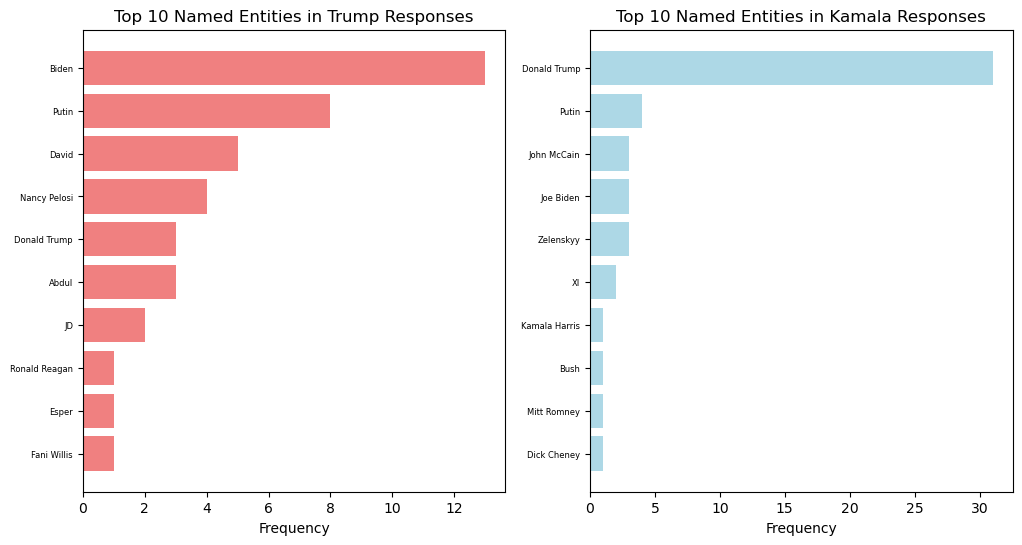

In [72]:
# We want to visualise the most common words that are not verbs or adjectives in the responses of Trump and Kamala
# but named entities

trump_named_entities = [ent.text for response in trumps_responses for ent in nlp(response).ents if ent.label_ == 'PERSON']
kamala_named_entities = [ent.text for response in kamalas_responses for ent in nlp(response).ents if ent.label_ == 'PERSON']

# Remove stopwords from the named entities
trump_named_entities = [entity for entity in trump_named_entities if entity.lower() not in stop_words]
kamala_named_entities = [entity for entity in kamala_named_entities if entity.lower() not in stop_words]

# If entities are in possessive form, remove the 's
trump_named_entities = [entity[:-2] if entity.endswith("'s") else entity for entity in trump_named_entities]
kamala_named_entities = [entity[:-2] if entity.endswith("'s") else entity for entity in kamala_named_entities]

trump_named_entity_freq = Counter(trump_named_entities)
kamala_named_entity_freq = Counter(kamala_named_entities)

trump_top_named_entities = [word for word, _ in trump_named_entity_freq.most_common(10)]
trump_top_named_entity_freqs = [freq for _, freq in trump_named_entity_freq.most_common(10)]

kamala_top_named_entities = [word for word, _ in kamala_named_entity_freq.most_common(10)]
kamala_top_named_entity_freqs = [freq for _, freq in kamala_named_entity_freq.most_common(10)]

# Plot the bar charts with most frequent named entity at the top
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(trump_top_named_entities, trump_top_named_entity_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 10 Named Entities in Trump Responses')
plt.gca().invert_yaxis()
plt.yticks(fontsize=6)

plt.subplot(1, 2, 2)
plt.barh(kamala_top_named_entities, kamala_top_named_entity_freqs, color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 10 Named Entities in Kamala Responses')
plt.gca().invert_yaxis()
plt.yticks(fontsize=6)

In [73]:
# How often do either of them use the word "understand" in their responses?
# And how frequently do they use the word "America" in their responses?
trump_understand_freq = trump_word_freq['understand']
kamala_understand_freq = kamala_word_freq['understand']

trump_america_freq = trump_word_freq['America']
kamala_america_freq = kamala_word_freq['America']

print('Frequency of the word "understand" in Trump responses:', trump_understand_freq)
print('Frequency of the word "understand" in Kamala responses:', kamala_understand_freq)
print('Frequency of the word "America" in Trump responses:', trump_america_freq)
print('Frequency of the word "America" in Kamala responses:', kamala_america_freq)

Frequency of the word "understand" in Trump responses: 5
Frequency of the word "understand" in Kamala responses: 23
Frequency of the word "America" in Trump responses: 3
Frequency of the word "America" in Kamala responses: 17


# Topic Modelling - TRUMP
### Evaluating the Cv coherence to chose the topic number

In [74]:
# Cleaning of responses before analysis

# print the first 5 trump responses before cleaning
print('First 5 Trump responses before cleaning:')
for idx, response in enumerate(trumps_responses[:5]):
    print(idx, response)

print('-----------------')

# Clean the responses from stopwords
trump_responses_cleaned = []
for response in trumps_responses:
    response_cleaned = ' '.join([word for word in response.split() if word.lower() not in stop_words])
    trump_responses_cleaned.append(response_cleaned)

# Lemmatize the words, i.e. reduce them to their base form
trump_responses_cleaned = []
for response in trumps_responses:
    doc = nlp(response)
    response_cleaned = ' '.join([token.lemma_ for token in doc if token.is_alpha])
    trump_responses_cleaned.append(response_cleaned)

# print the first 5 trump responses after cleaning
print('First 5 Trump responses after cleaning:')
for idx, response in enumerate(trump_responses_cleaned[:5]):
    print(idx, response)
    

First 5 Trump responses before cleaning:
0 Nice to see you. Have fun.
1 Thank you.
2 First of all, I have no sales tax. That's an incorrect statement. She knows that. We're doing tariffs on other countries. Other countries are going to finally, after 75 years, pay us back for all that we've done for the world. And the tariff will be substantial in some cases. I took in billions and billions of dollars, as you know, from China. In fact, they never took the tariff off because it was so much money, they can't. It would totally destroy everything that they've set out to do. They've taken in billions of dollars from China and other places. They've left the tariffs on. When I had it, I had tariffs and yet I had no inflation. Look, we've had a terrible economy because inflation has -- which is really known as a country buster. It breaks up countries. We have inflation like very few people have ever seen before. Probably the worst in our nation's history. We were at 21%. But that's being gener

In [75]:
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Set topic numbers to be tested
min_topics = 1
max_topics = 30

# Create a dictionary from the responses
trump_responses_tokenized = [response.split() for response in trump_responses_cleaned]
trump_dictionary = Dictionary(trump_responses_tokenized)

# Create a bag of words corpus
trump_corpus = [trump_dictionary.doc2bow(response) for response in trump_responses_tokenized]

# Calculate coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(min_topics, max_topics + 1):
    # Use Gensim's LDA model
    trump_lda_model = LdaModel(corpus=trump_corpus, id2word=trump_dictionary, num_topics=num_topics, random_state=42)
    
    # Calculate coherence using Gensim's LDA model
    coherence_model = CoherenceModel(model=trump_lda_model, texts=trump_responses_tokenized, dictionary=trump_dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)




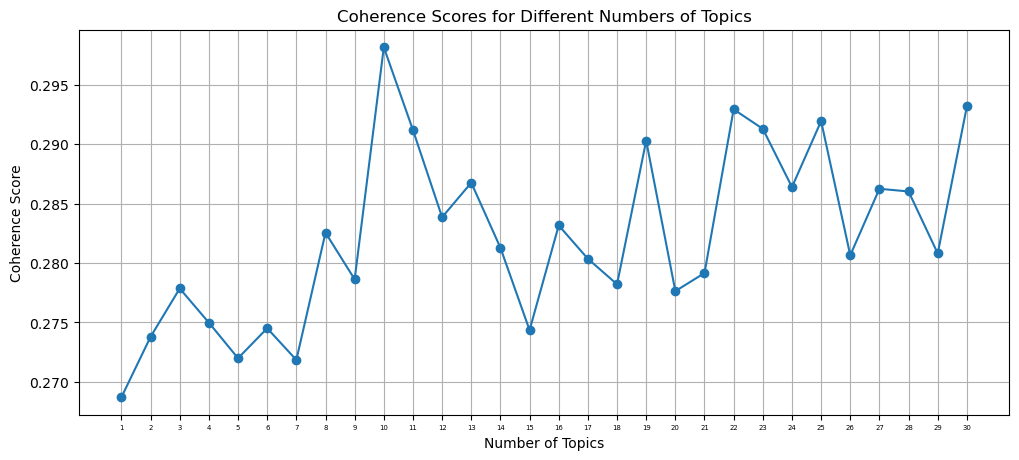

In [43]:
# Plot the coherence scores
plt.figure(figsize=(12, 5))
plt.plot(range(min_topics, max_topics + 1), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
# x ticks should only be integers
plt.xticks(range(min_topics, max_topics + 1, 1))
# xticks smaller font
plt.xticks(fontsize=5)
plt.title('Coherence Scores for Different Numbers of Topics')
plt.grid(True)
plt.show()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model

# Create a CountVectorizer object
# Make sure that max_df corresponds to < documents than min_df
# Set stop_words to 'english' to remove common English stopwords
# Set max_df to 0.95 to remove words that appear in more than 95% of the documents
# Set min_df to 2 to remove words that appear in less than 2 documents
# Create the vectorizer and fit the responses
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
trump_vectorized = vectorizer.fit_transform(trump_responses_cleaned)

# Fit the LDA model
trump_lda = LatentDirichletAllocation(n_components=10, random_state=42)
trump_lda.fit(trump_vectorized)

# Now prepare the pyLDAvis data using the LDA model and vectorizer
pyldavis_data = pyLDAvis.lda_model.prepare(trump_lda, trump_vectorized, vectorizer)

# Store the pyLDAvis data as an HTML file
pyLDAvis.save_html(pyldavis_data, '../output/trump_topics.html')

# Topic Modelling - HARRIS
### Evaluating the Cv coherence to chose the topic number

In [77]:
# Cleaning of responses before analysis

# print the first 5 kamala responses before cleaning
print('First 5 Kamalas responses before cleaning:')
for idx, response in enumerate(kamalas_responses[:5]):
    print(idx, response)

print('-----------------')

# Clean the responses from stopwords
kamala_responses_cleaned = []
for response in kamalas_responses:
    response_cleaned = ' '.join([word for word in response.split() if word.lower() not in stop_words])
    kamala_responses_cleaned.append(response_cleaned)

# Lemmatize the words, i.e. reduce them to their base form
kamala_responses_cleaned = []
for response in kamalas_responses:
    doc = nlp(response)
    response_cleaned = ' '.join([token.lemma_ for token in doc if token.is_alpha])
    kamala_responses_cleaned.append(response_cleaned)

# print the first 5 kamala responses after cleaning
print('First 5 kamala responses after cleaning:')
for idx, response in enumerate(kamala_responses_cleaned[:5]):
    print(idx, response)
    

First 5 Kamalas responses before cleaning:
0 Kamala Harris. Let's have a good debate.
1 Thank you.
2 So, I was raised as a middle-class kid. And I am actually the only person on this stage who has a plan that is about lifting up the middle class and working people of America. I believe in the ambition, the aspirations, the dreams of the American people. And that is why I imagine and have actually a plan to build what I call an opportunity economy. Because here's the thing. We know that we have a shortage of homes and housing, and the cost of housing is too expensive for far too many people. We know that young families need support to raise their children. And I intend on extending a tax cut for those families of $6,000, which is the largest child tax credit that we have given in a long time. So that those young families can afford to buy a crib, buy a car seat, buy clothes for their children. My passion, one of them, is small businesses. I was actually -- my mother raised my sister and

In [78]:
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Set topic numbers to be tested
min_topics = 1
max_topics = 30

# Create a dictionary from the responses
kamala_responses_tokenized = [response.split() for response in kamala_responses_cleaned]
kamala_dictionary = Dictionary(kamala_responses_tokenized)

# Create a bag of words corpus
kamala_corpus = [kamala_dictionary.doc2bow(response) for response in kamala_responses_tokenized]

# Calculate coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(min_topics, max_topics + 1):
    # Use Gensim's LDA model
    kamala_lda_model = LdaModel(corpus=kamala_corpus, id2word=kamala_dictionary, num_topics=num_topics, random_state=42)
    
    # Calculate coherence using Gensim's LDA model
    coherence_model = CoherenceModel(model=kamala_lda_model, texts=kamala_responses_tokenized, dictionary=kamala_dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)




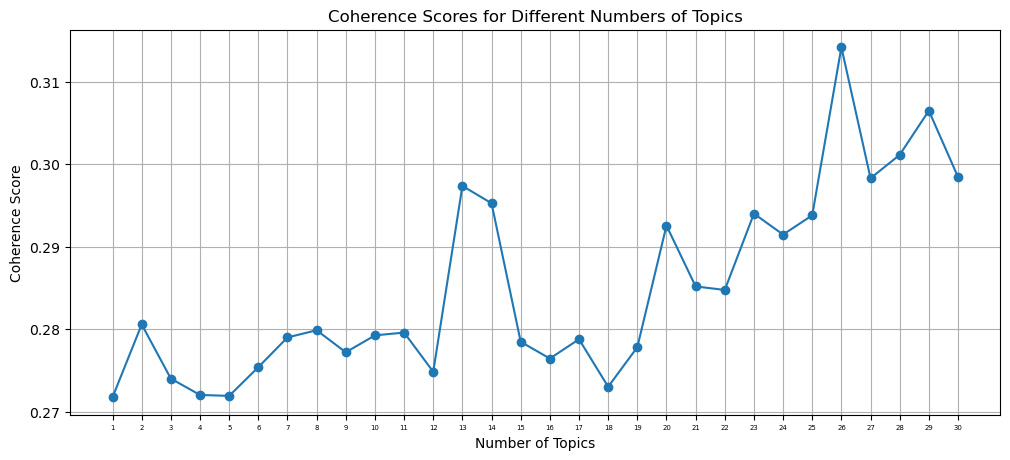

In [47]:
# Plot the coherence scores
plt.figure(figsize=(12, 5))
plt.plot(range(min_topics, max_topics + 1), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
# x ticks should only be integers
plt.xticks(range(min_topics, max_topics + 1, 1))
# xticks smaller font
plt.xticks(fontsize=5)
plt.title('Coherence Scores for Different Numbers of Topics')
plt.grid(True)
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model

# Create a CountVectorizer object
# Make sure that max_df corresponds to < documents than min_df
# Set stop_words to 'english' to remove common English stopwords
# Set max_df to 0.95 to remove words that appear in more than 95% of the documents
# Set min_df to 2 to remove words that appear in less than 2 documents
# Create the vectorizer and fit the responses
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
kamala_vectorized = vectorizer.fit_transform(kamala_responses_cleaned)

# Fit the LDA model
kamala_lda = LatentDirichletAllocation(n_components=10, random_state=42)
kamala_lda.fit(kamala_vectorized)

# Now prepare the pyLDAvis data using the LDA model and vectorizer
pyldavis_data = pyLDAvis.lda_model.prepare(kamala_lda, kamala_vectorized, vectorizer)

# Store the pyLDAvis data as an HTML file
pyLDAvis.save_html(pyldavis_data, '../output/kamala_topics.html')

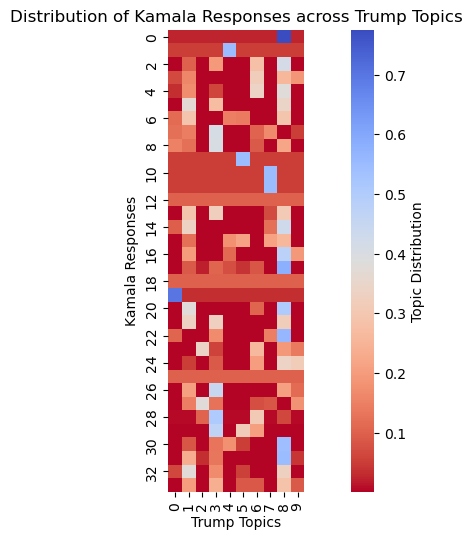

In [63]:
# Now we would like to compare both topics models side by side to see if there are any similarities or differences
# We will do that by analysing the overlaps between the top words in each topic

# Get the top words for each topic in the Trump model
trump_topics = trump_lda.components_
trump_topic_words = []
for topic in trump_topics:
    top_word_indices = topic.argsort()[-10:][::-1]
    # We remember that CountVectorizer object has no attribute 'get_feature_names'
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    trump_topic_words.append(top_words)

# Get the top words for each topic in the Kamala model
kamala_topics = kamala_lda.components_
kamala_topic_words = []
for topic in kamala_topics:
    top_word_indices = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    kamala_topic_words.append(top_words)

# We now plot Trumps topics and show how each of Kamalas responses are distributed across them
# We will use seaborn's heatmap for this

import seaborn as sns
import numpy as np

# Create a matrix to store the distribution of Kamala's responses across Trump's topics
kamala_topic_distribution = np.zeros((len(kamala_responses_cleaned), len(trump_topics)))

# Transform Kamala's responses into vectors
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
trump_vectorized = vectorizer.fit_transform(trump_responses_cleaned)
kamala_vectorized = vectorizer.transform(kamala_responses_cleaned)

# Get the topic distribution for each Kamala response
for i, response in enumerate(kamala_vectorized):
    topic_distribution = trump_lda.transform(response)
    kamala_topic_distribution[i] = topic_distribution

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(kamala_topic_distribution, cmap='coolwarm_r', cbar_kws={'label': 'Topic Distribution'})
plt.xlabel('Trump Topics')
plt.ylabel('Kamala Responses')
# square aspect ratio for the heatmap
plt.xticks(rotation=90)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Distribution of Kamala Responses across Trump Topics')
plt.show()




In [65]:
# Provide titles for each of the topics in both models
# by looking at the top words in each topic
trump_topic_titles = [' '.join(words) for words in trump_topic_words]
kamala_topic_titles = [' '.join(words) for words in kamala_topic_words]

# Print the titles for each topic in both models
print('Trump Topics:')
for idx, title in enumerate(trump_topic_titles):
    print(f'Topic {idx + 1}: {title}')

print('-----------------')

print('Kamala Topics:')
for idx, title in enumerate(kamala_topic_titles):
    print(f'Topic {idx + 1}: {title}')

    

Trump Topics:
Topic 1: state want abortion vote everybody lie sign issue come think
Topic 2: say person country people know china bad economy stand build
Topic 3: say governor baby taliban know virginia war start maybe just
Topic 4: people country world thing say year want leader just talk
Topic 5: vote say pay people liberal country state nato court great
Topic 6: country crime case allow come criminal bad think month happen
Topic 7: country tariff billion people look president inflation money year know
Topic 8: people loan student congress say way think weak prosecute question
Topic 9: say people thing just plan let good vote come like
Topic 10: war billion president leave know million putin biden speak settle
-----------------
Kamala Topics:
Topic 1: refuse start national tariff fuel month putin day settle plan
Topic 2: vice father rally putin week wade threat refuse mistake tear
Topic 3: putin refuse baby week national soon wade bring mistake die
Topic 4: throw rally change surpris